# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression 

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(data.shape)
print("Is there any NA? ", data.isna().values.any())
print("Is there any duplicates? ", data.duplicated().values.any())
print(data.info())
data.head(2)

(5391, 6)
Is there any NA?  False
Is there any duplicates?  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [7]:
columns_to_update = ['USD_Domestic_Gross', 'USD_Worldwide_Gross', 'USD_Production_Budget']
symbols_to_remove = ['$', ',']

for col in columns_to_update:
    for s in symbols_to_remove:
        data[col] = data[col].astype(str).str.replace(s,"")
    data[col]=pd.to_numeric(data[col])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [8]:
data['Release_Date']=pd.to_datetime(data['Release_Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [16]:
# print(f"Average porduction budget: ${data['USD_Production_Budget'].mean()}")
# print(f"Average worldwide gross revenue: ${data['USD_Worldwide_Gross'].mean()}")
# print(f"Minimum for worldwide: ${data['USD_Worldwide_Gross'].min()}. Minimum for domestic: ${data['USD_Domestic_Gross'].min()}")
data['Gross_Worldwide_Profit'] =data['USD_Worldwide_Gross']-data['USD_Production_Budget']

data.describe()


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44","57,741,684.38"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00,"-175,000,000.00"
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50","-2,244,775.00"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00","8,122,000.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00","59,518,660.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27","140,972,329.93"


In [25]:
data[data['Gross_Worldwide_Profit']==data['Gross_Worldwide_Profit'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982


In [43]:

min_profit =data.loc[data['USD_Worldwide_Gross']!=0, 'Gross_Worldwide_Profit'].min()
min_profit_row = data[(data['Gross_Worldwide_Profit']==min_profit)&(data['USD_Worldwide_Gross']!=0)]
min_profit_row


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
5366,79,2017-07-21,Valerian and the City of a Thousand Planets,180000000,52573132,31023132,-127426868


In [47]:
min_budget = data.loc[data['USD_Production_Budget']>0,'USD_Production_Budget'].min()

cheapest_film = data[data['USD_Production_Budget']==min_budget]
cheapest_film

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [49]:
zero_domestic = data[data['USD_Domestic_Gross']==0]
zero_domestic.sort_values('USD_Production_Budget', ascending=False, inplace=True)
data[data['USD_Domestic_Gross']==0].describe()
zero_domestic

C:\Users\Егор\AppData\Local\Temp\ipykernel_15132\2825573235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_domestic.sort_values('USD_Production_Budget', ascending=False, inplace=True)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [22]:
data[data['USD_Worldwide_Gross']==0].describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
count,357.00,357,357.00,357.00,357.00,357.00
mean,"4,444.68",2010-04-24 09:08:34.285714176,"5,815,404.99",0.00,0.00,"-5,815,404.99"
min,96.00,1916-05-09 00:00:00,"1,400.00",0.00,0.00,"-175,000,000.00"
25%,"4,148.00",2009-12-31 00:00:00,"500,000.00",0.00,0.00,"-4,400,000.00"
50%,"4,751.00",2014-05-12 00:00:00,"1,500,000.00",0.00,0.00,"-1,500,000.00"
75%,"5,108.00",2015-06-10 00:00:00,"4,400,000.00",0.00,0.00,"-500,000.00"
max,"5,390.00",2020-12-31 00:00:00,"175,000,000.00",0.00,0.00,"-1,400.00"
std,995.70,NaN,"16,262,169.21",0.00,0.00,"16,262,169.21"


### Filtering on Multiple Conditions

In [50]:
international_releases = data.loc[(data['USD_Domestic_Gross']==0)&(data['USD_Worldwide_Gross']!=0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [63]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [68]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
not_released = data.query('Release_Date > @scrape_date')
print(f'{len(not_released)} films has not been released yet.')
not_released

7 films has not been released yet.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [70]:
# clean_data = data.query('Release_Date < @scrape_date')
clean_data = data.drop(not_released.index)
clean_data.shape

(5384, 7)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [77]:
print(f"Production costs exceeded the worldwide gross revenue in {clean_data.query('USD_Worldwide_Gross < USD_Production_Budget').shape[0]/clean_data.shape[0]*100}%")

Production costs exceeded the worldwide gross revenue in 37.27711738484398%


# Seaborn for Data Viz: Bubble Charts

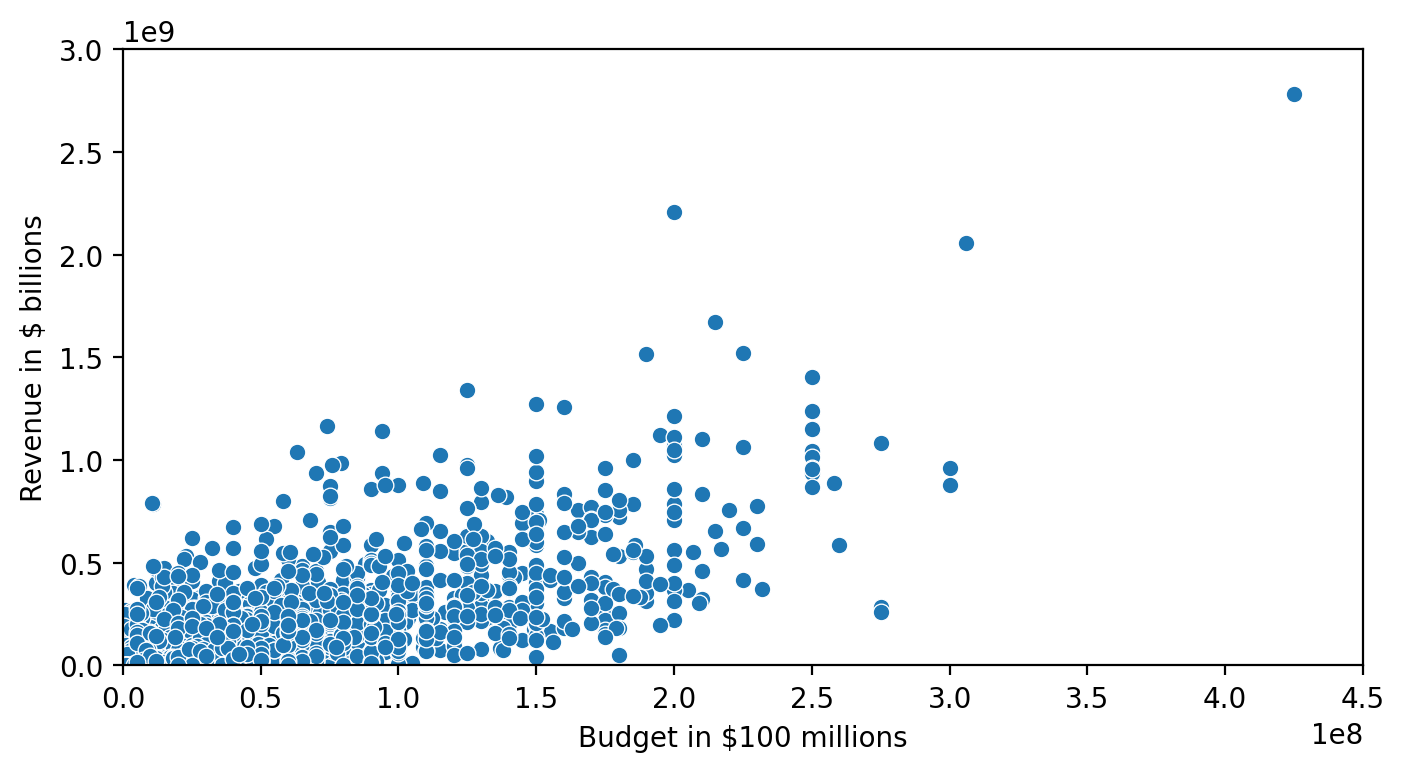

In [81]:
plt.figure(figsize=(8,4),dpi=200)
ax = sns.scatterplot(clean_data, x='USD_Production_Budget', y='USD_Worldwide_Gross', )
ax.set(ylim=(0, 3000000000),
       xlim =(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions'
       )

plt.show()

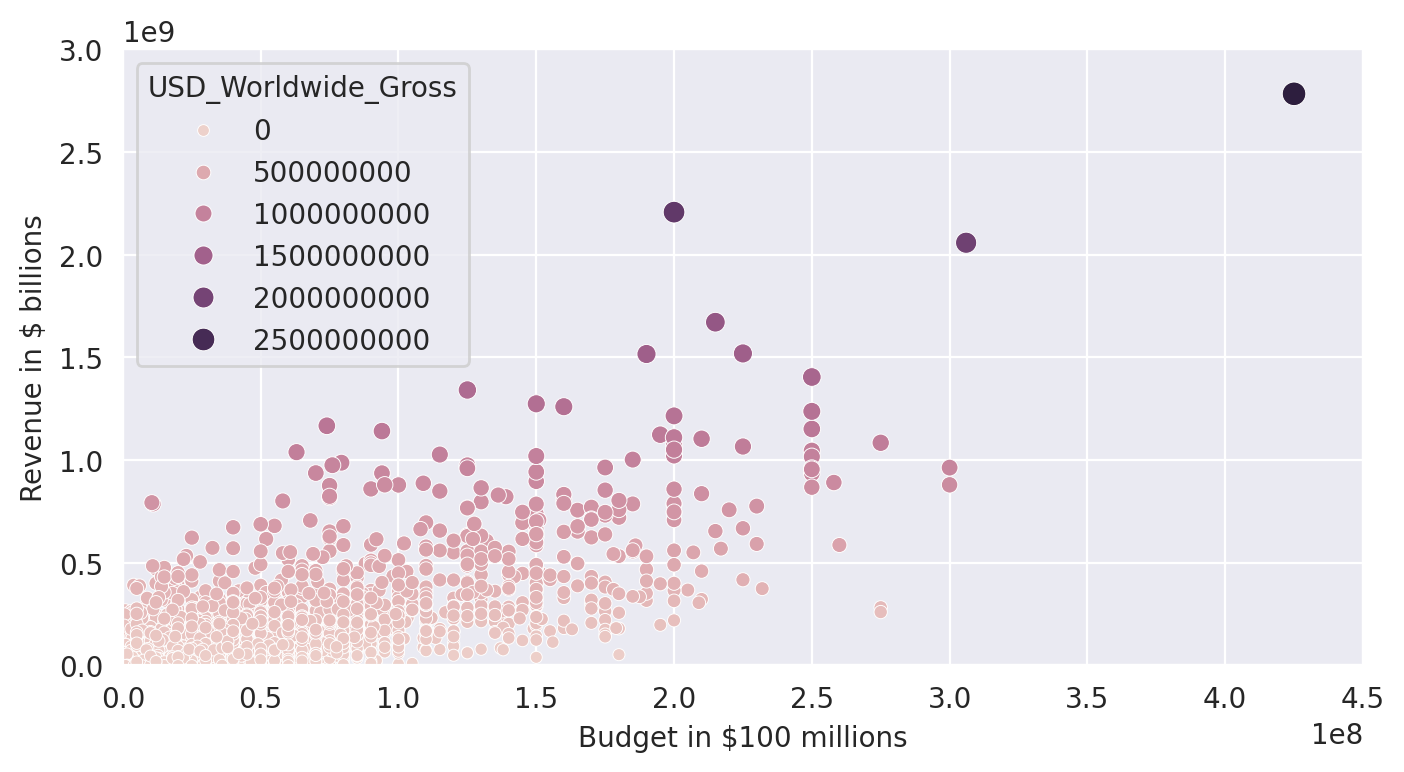

In [86]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('darkgrid') :     
       ax = sns.scatterplot(clean_data, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue="USD_Worldwide_Gross", size='USD_Worldwide_Gross')
       ax.set(ylim=(0, 3000000000),
       xlim =(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions'
       )

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



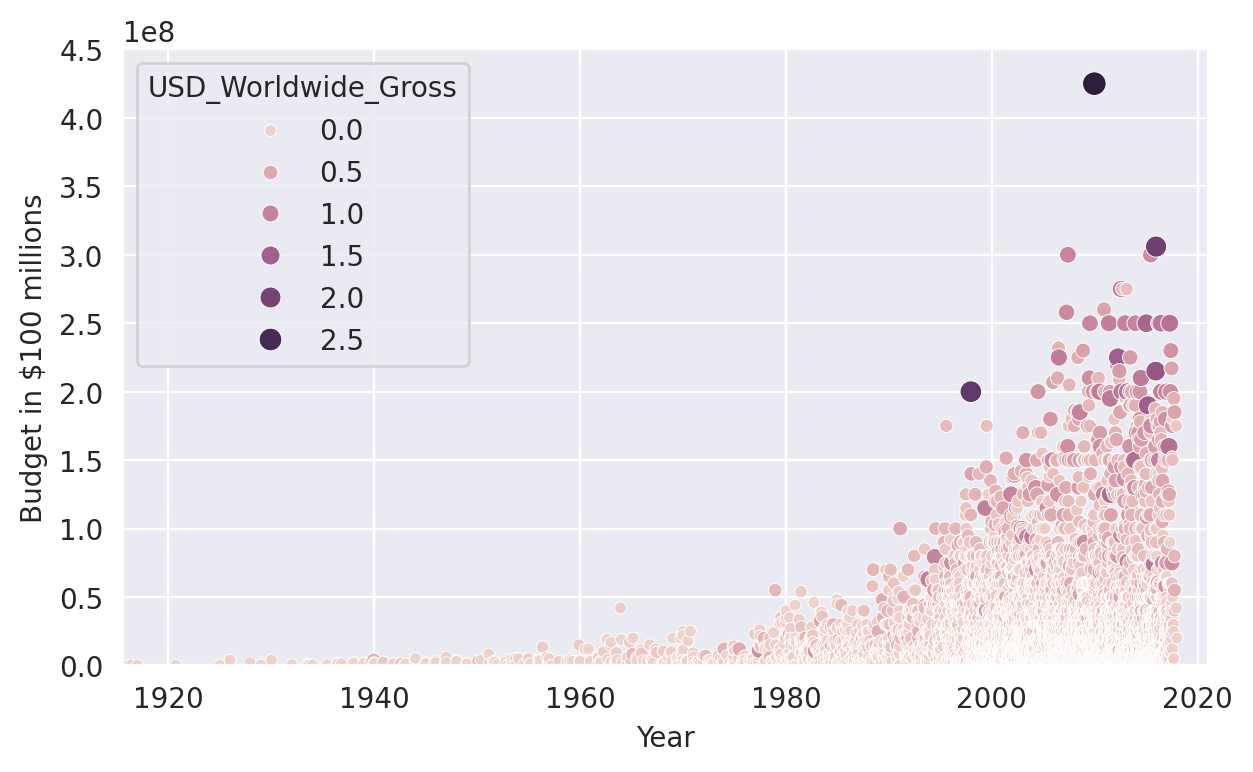

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit
0,5293,1915-08-02,The Birth of a Nation,110000,0.01,10000000,10890000
1,5140,1916-05-09,Intolerance,385907,0.00,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,0.01,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,0.00,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,0.02,11000000,21755000


In [98]:
plt.figure(figsize=(7,4),dpi=200)
with sns.axes_style('darkgrid') :     
       ax = sns.scatterplot(clean_data, x='Release_Date', y='USD_Production_Budget', hue="USD_Worldwide_Gross", size='USD_Worldwide_Gross')
       ax.set(
       ylim=(0, 450000000),
       xlim = (data['Release_Date'].min(),data['Release_Date'].max()),
       xlabel='Year',
       ylabel='Budget in $100 millions'
       )

plt.show()
clean_data.head()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [104]:

clean_data['Decade']=clean_data['Release_Date'].dt.year//10*10
clean_data.head() 


dt_index = pd.DatetimeIndex(clean_data.Release_Date)
years = dt_index.year
years


Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [120]:
old_films = clean_data[clean_data['Release_Date']<pd.to_datetime('1970')]
new_films = clean_data[clean_data['Release_Date']>=pd.to_datetime('1970')]

print(f"Number of films before 1970 -- {old_films.shape[0]}")
print(f"Number of films after 1970 --{new_films.shape[0]}")
print(f"Most expensive film before 1970 was {old_films.loc[old_films['USD_Production_Budget'].idxmax(), 'Movie_Title']}")


Number of films before 1970 -- 153
Number of films after 1970 --5231
Most expensive film before 1970 was Cleopatra


# Seaborn Regression Plots

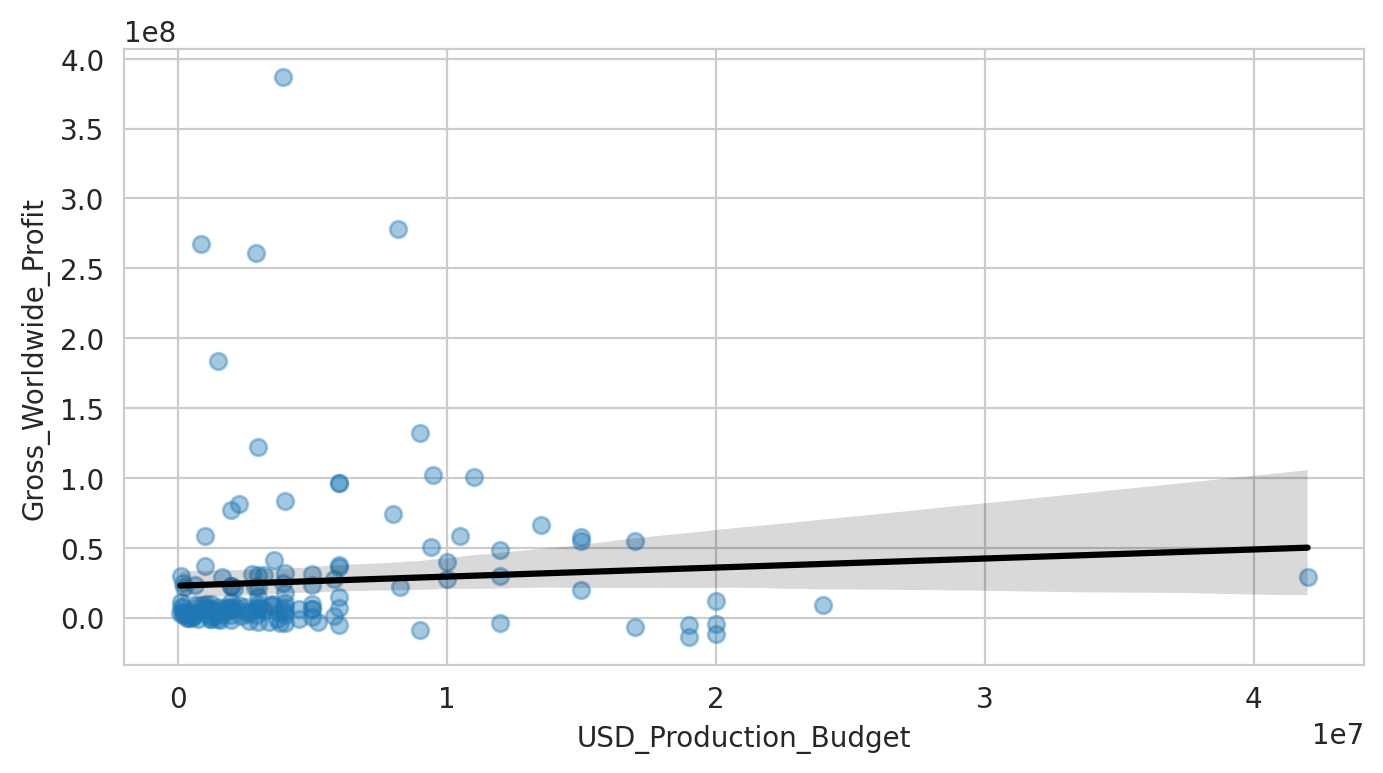

In [123]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                scatter_kws={
                "alpha":0.4,                  
                },
                line_kws={
                    'color':"black"
                })


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

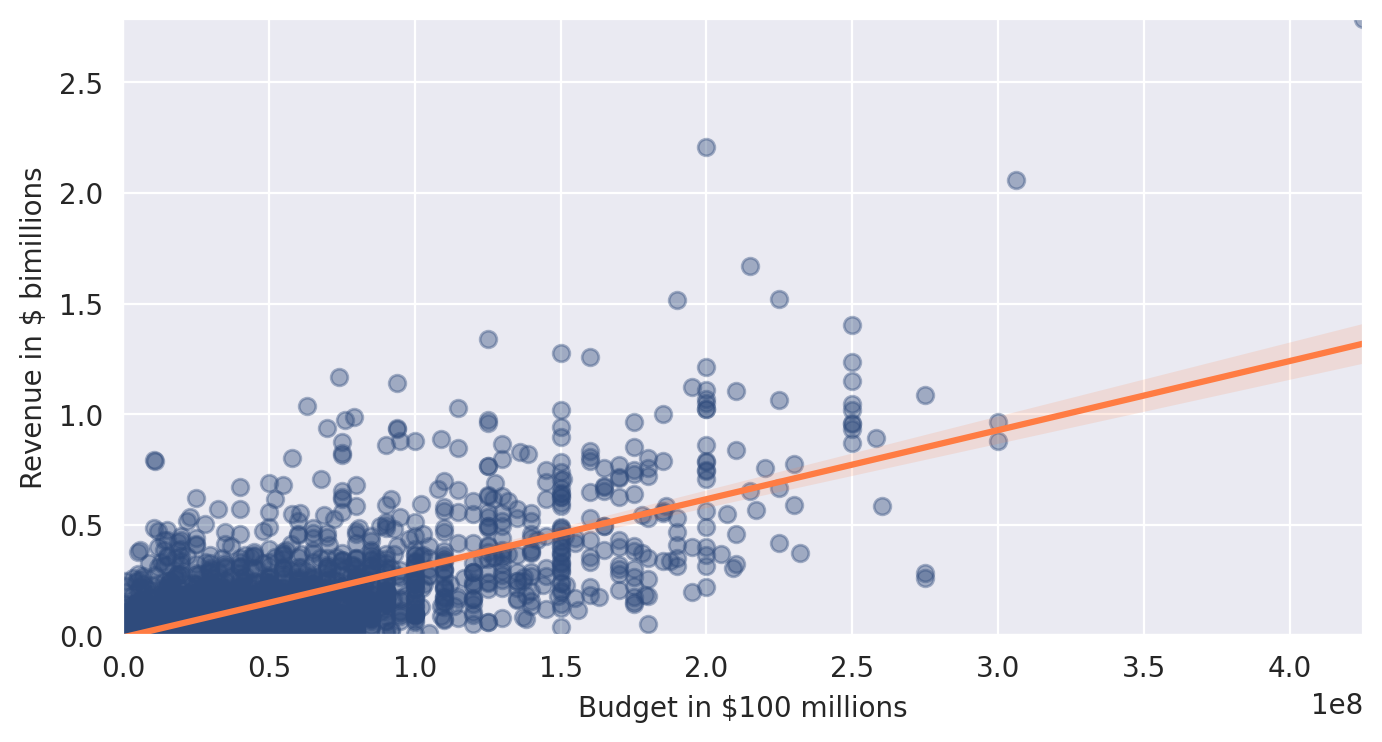

In [134]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.regplot(new_films, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                color='#2f4b7c' ,                 
                scatter_kws={
                "alpha":0.4,
                },
                line_kws={
                    'color':"#ff7c43"
                },
                )
    
    ax.set(
       ylim=(0, new_films['USD_Worldwide_Gross'].max()),
       xlim = (0,new_films['USD_Production_Budget'].max()),
       xlabel='Budget in $100 millions',
       ylabel='Revenue in $ bimillions'
       )



**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [162]:
regression = LinearRegression()
x = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
print(x.shape)
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
print(y.shape)


regression.fit(x, y)


(5231, 1)
(5231, 1)


LinearRegression()

In [161]:
new_films.tail(6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross_Worldwide_Profit,Decade
5378,914,2017-10-02,Fifty Shades Darker,55000000,"376,856,949.00",114434010,321856949,2010
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,"166,893,990.00",92029184,126893990,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,"561,137,727.00",168052812,376137727,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,"140,012,608.00",39175066,-34987392,2010
5382,1254,2017-12-05,Snatched,42000000,"57,850,343.00",45850343,15850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0.00,0,-20000000,2010


In [163]:
print(regression.coef_)
print(regression.intercept_)


[[3.12259592]]
[-8650768.00661042]


In [164]:
regression.score(x,y)

0.5577032617720403

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [169]:
regression_old_films = LinearRegression()
x=pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y=pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
regression_old_films.fit(x,y)
print(regression_old_films.coef_[0][0])
print(regression_old_films.intercept_[0])
print(regression.score(x,y))

1.6477131440107313
22821538.635080386
-0.19720041850977843


In [174]:
regression.predict([[350_000_000]])

c:\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.0842578e+09]])

In [176]:
estimate = regression.intercept_[0] + regression.coef_[0,0]*350_000_000
estimate

1084257803.0557737

Today was a pretty packed lesson where we introduced a lot of new concepts. In this lesson we looked at how to:

Use nested loops to remove unwanted characters from multiple columns

Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

Create bubble charts using the Seaborn Library

Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

Use floor division (i.e., integer division) to convert years to decades

Use Seaborn to superimpose a linear regressions over our data

Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

Run regressions with scikit-learn and calculate the coefficients.

